# Credit Card Customer Segmentation

# Introduction

In this project, we'll play the role of a data scientist at a credit card company. The dataset we're using contains information about the company's clients. We're asked to segment the clients into differnt groups to help identify patterns as to apply specific business strategies per group. 

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

We'll use the K-Means algorithm to segment the data. The steps we'll following to achieve our goals properly are:
* Analyze the dataset
* Prepare the data for modeling
* Find an appropriate number of clusters
* Segment the data
* Interpret and explain the results

Here is the data dictionary:
* `customer_id`: unique identifier for each customer.
* `age`: customer age in years.
* `gender`: customer gender (M or F).
* `dependent_count`: number of dependents of each customer.
* `education_level`: level of education ("High School", "Graduate", etc.).
* `marital_status`: marital status ("Single", "Married", etc.).
* `estimated_income`: the estimated income for the customer projected by the data science team.
* `months_on_book`: time as a customer in months.
* `total_relationship_count`: number of times the customer contacted the company.
* `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
* `credit_limit`: customer's credit limit.
* `total_trans_amount`: the overall amount of money spent on the card by the customer.
* `total_trans_count`: the overall number of times the customer used the card.
* `avg_utilization_ratio`: daily average utilization ratio.

Let's start by loading in our libraries and checking out the dataset.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading in the dataset
customers = pd.read_csv('customer_segmentation.csv')

customers.shape

(10127, 14)

The `customers` dataset has `14` columns and `10,127` rows.

In [3]:
# Checking out data
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [4]:
# Info
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

There doesn't seem to be any missing data. There are `11` numerical and `3` categorical columns.

In [5]:
# Descriptive statistics for numerical columns
customers.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


Between all the `min's`, `max's`, and `mean's` for each column, all the values make sense. Also the `customer_id` column will not be needed for the segmentation. Now let's take a look at the distribution of the categorical columns.

In [6]:
# Categorical columns to loop thru
categorical = ['gender', 'education_level', 'marital_status']

# Printing counts for unique values in each categorical column
for col in categorical:
    print(col)
    print(customers[col].value_counts(normalize=True)*100, end='\n\n')

gender
F    52.908068
M    47.091932
Name: gender, dtype: float64

education_level
Graduate         36.387874
High School      23.215167
Uneducated       17.329910
College          11.770514
Post-Graduate     6.082749
Doctorate         5.213785
Name: education_level, dtype: float64

marital_status
Married     46.282216
Single      38.935519
Unknown      7.396070
Divorced     7.386195
Name: marital_status, dtype: float64



Above we can see the distrubutions of the categorical columns as percentages. As we're working with unsupervised machine learning, there isn't a target variable on which we can measure the impacts of the other variables. 

Let's see the correlations between the numerical variables amongst each other.

<Axes: >

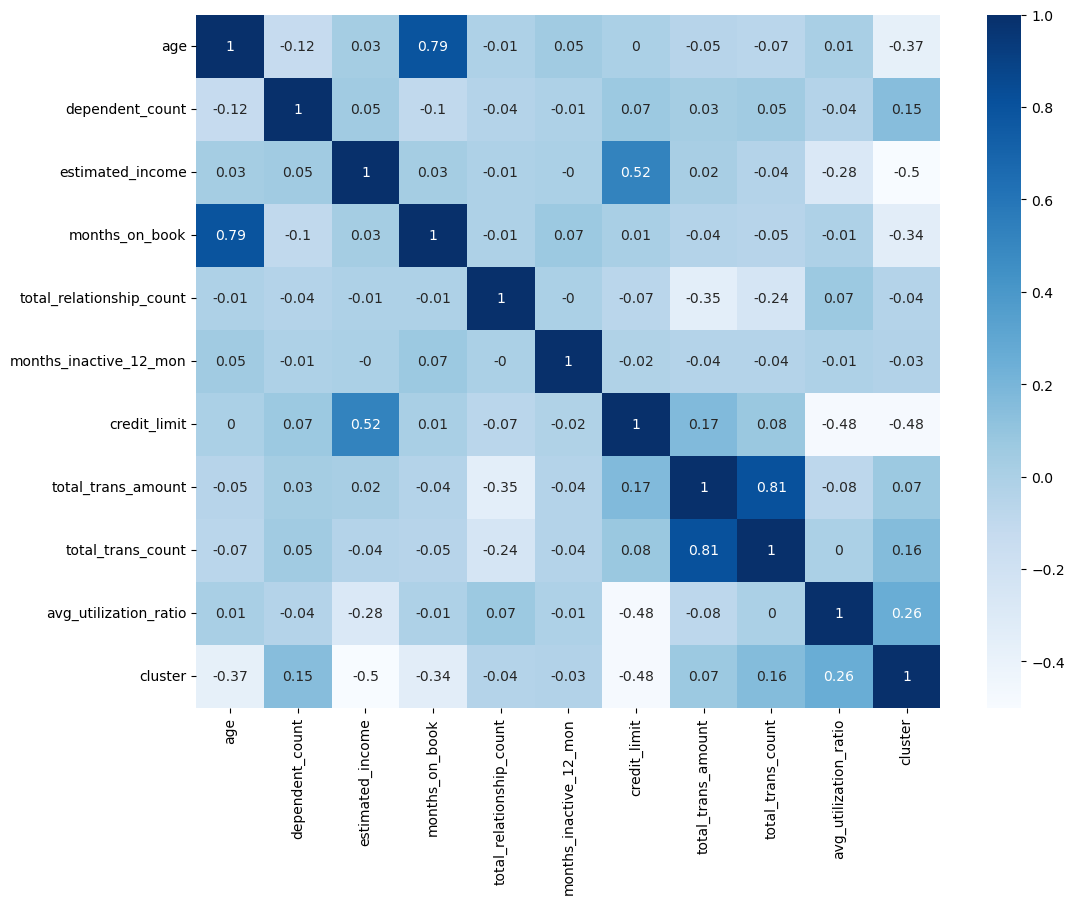

In [22]:
## Heatmap showing Pearson's correlations amongst the numerical columns

# Figure size
plt.subplots(figsize=(12,9))

# Heatmap with rounded values inside each box
sns.heatmap(round(customers.drop('customer_id', axis=1).corr(numeric_only=True), 2),
            cmap='Blues', annot=True)

Most of the variables present weak correlations between each other, but there are some we can highlight:

* Age is strongly correlated with how long the person has been a customer (months_on_book);
* Credit limit is positively correlated with the estimated income and negatively correlated with the average utilization ratio;
* The total number of transactions (total_trans_count) is strongly correlated with the total amount transitioned (total_trans_amount).

Next, let's visualize the distribution of values for each numerical column using histograms.

/var/folders/y4/hvrh6gb14vq_vm7rkh_0g52w0000gn/T/ipykernel_49402/2650417006.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  customers.drop('customer_id', axis=1).hist(ax=ax)


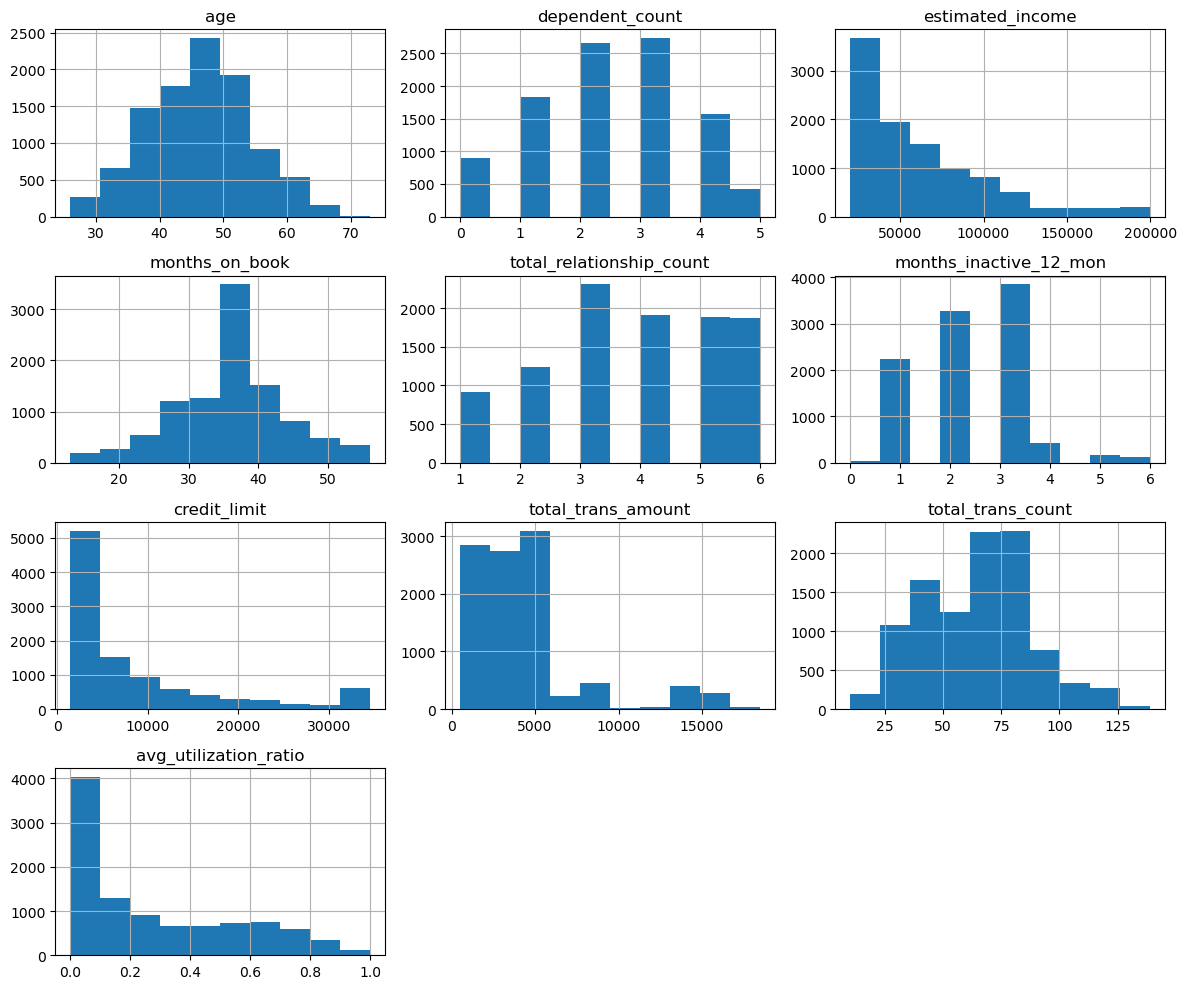

In [8]:
## Histograms for each numerical column

# Figure size for subplots
fig, ax = plt.subplots(figsize=(12,10))

# Histograms
customers.drop('customer_id', axis=1).hist(ax=ax)

# Fits subplots into figure
plt.tight_layout()

For the the distributions above, a couple of them have normal distibutions and the rest are skewed.

# Feature Engineering

We have three categorical columns to deal with: `gender`, `education_level`, and `marital_status`. 

We'll start with gender. This feature contains values `M` and `F` respresenting male or female. We can replace these values with 1 for male and 0 for female.

With the education level feature we can replace the values with numbers representing the ranks in education. This is how it would look.

* `Uneducated - 0`
* `High School - 1`
* `College - 2`
* `Graduate - 3`
* `Post-Graduate - 4`
* `Doctorate - 5`

We'll start with these two features first and do it all on a copy of our data.

In [9]:
# Copy of data
customers_modif = customers.copy()

# Replacing 'M' with 1 and 'F' with 0 in gender column using lambda function
customers_modif['gender'] = customers_modif['gender'].apply(lambda x: 1 if x == 'M' else 0)

In [10]:
# Replacing education_level values to numeric values
customers_modif.replace(to_replace={'Uneducated': 0, 'High School': 1, 'College': 2, 
                                    'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5}, inplace=True)

customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000


Now dealing with the `marital_status` feature, we have 5 values.

* `Single`
* `Married`
* `Divorced`
* `Unknown`

We can't replace these values with ranking numbers like we did with `education_level` because each value is equally valid, and there's no inherent order among them. We'll use one-hot encoding to create dummy variables from our column, converting categorical data into binary values (1 or 0) to indicate the presence or absence of each category.

In [11]:
# Creating dummy variables as a df
dummies = pd.get_dummies(customers_modif[['marital_status']], drop_first=True)

# Combining dataframes and droping the marital status column
customers_modif = pd.concat([customers_modif, dummies], axis=1)
customers_modif.drop('marital_status', axis=1, inplace=True)

# Checking correctness
print(customers_modif.shape)
customers_modif.head()

(10127, 16)


,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


# Scaling the Data

Before we can segment our data, we want to have all of the features scaled to the same size. Right now we have features like `estimated_income` ranging in values from 20k-200k and `dependent_count` ranging from 1-5. Let's go ahead and scale our data using scikit-learn's `StandardScaler()`.

In [12]:
# Dropping customer_id
X = customers_modif.drop('customer_id', axis=1)

# Scaling X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Transforming back to df
X = pd.DataFrame(data=X_scaled)

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


# Choosing K

Time to choose the number of clusters we want to use. We'll run the K-Means algorithm using a range of k's 1-10 and store the inertias. We'll then plot the inertias, which will be an elbow curve, and decide how many clusters to choose moving forward.

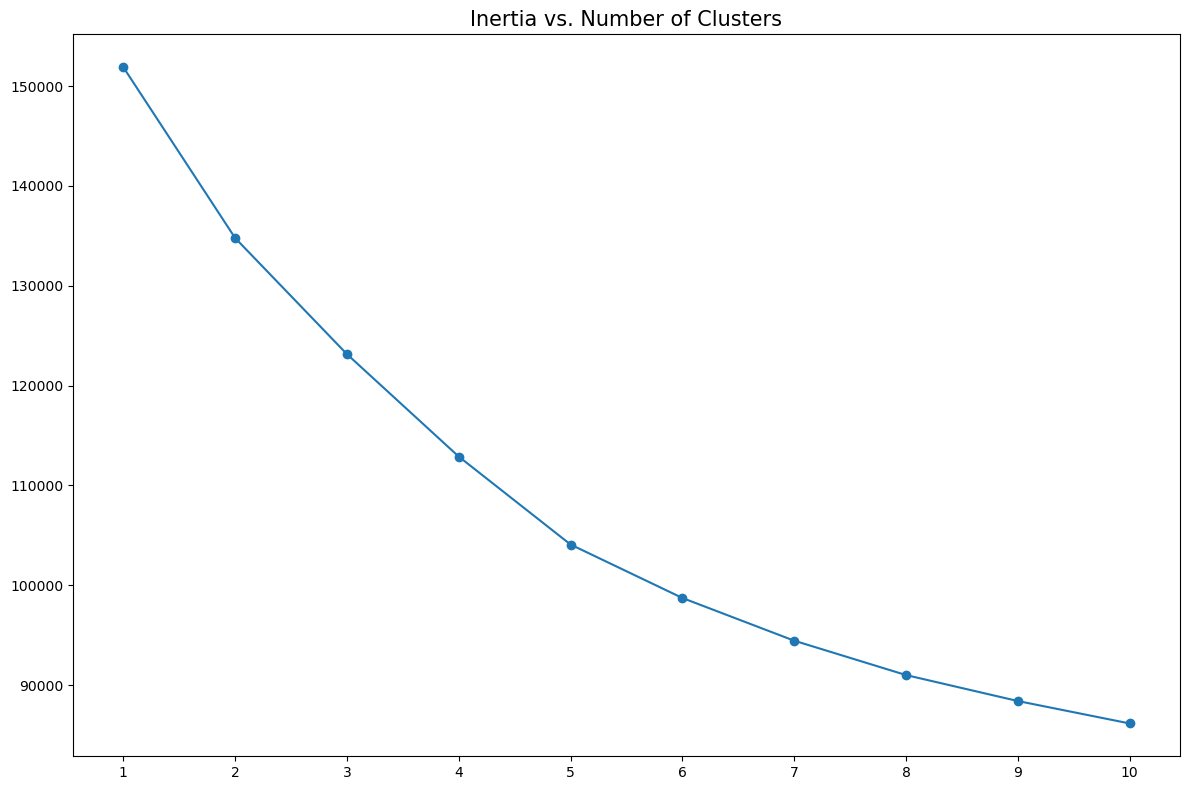

In [13]:
## Choosing n of clusters by plotting elbow curve of inertias

# Intialized list for intertias
inertias = []

# Number of clusters to loop thru
for k in range(1,11):
    
    # Instantiating KMeans clustering models for each cluster, running 10 times
    model = KMeans(n_clusters=k, n_init=10)
    
    # Fits and predicts cluster group for each sample in the model
    model.fit_predict(X)
    
    # Inertias for each model appended to list
    inertia = model.inertia_
    inertias.append(inertia)

# Figure size
plt.figure(figsize=(12,8))

# Line plot of inertias from list
plt.plot(range(1,11), inertias, marker='o')

# X-axis tick range and lables
plt.xticks(ticks=range(1,11), labels=range(1,11))

# Title
plt.title('Inertia vs. Number of Clusters', size=15)

The momentum of the inertias start to slow down around the 6 mark. So `6` will be the number of clusters we'll use.

In [14]:
# Using 6 clusters in the new model
model = KMeans(n_clusters=6, n_init=10)
y = model.fit_predict(X)

print(len(y))
y

10127


array([0, 5, 0, ..., 4, 2, 4], dtype=int32)

# Analyzing Results

Now let's create a `cluster` column!

In [15]:
# Adding cluster column
customers['cluster'] = y + 1

customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,cluster
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,1
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,6
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,1
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,3
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,5


In [16]:
# Cluster count
customers['cluster'].value_counts()

5    2815
6    2448
1    1783
2    1443
4     909
3     729
Name: cluster, dtype: int64

Cluster `5` has the majority of data points while cluster `3` has the minority. 

For the numerical data, we'll group by the mean of each variable per cluster using bar graphs for each column.

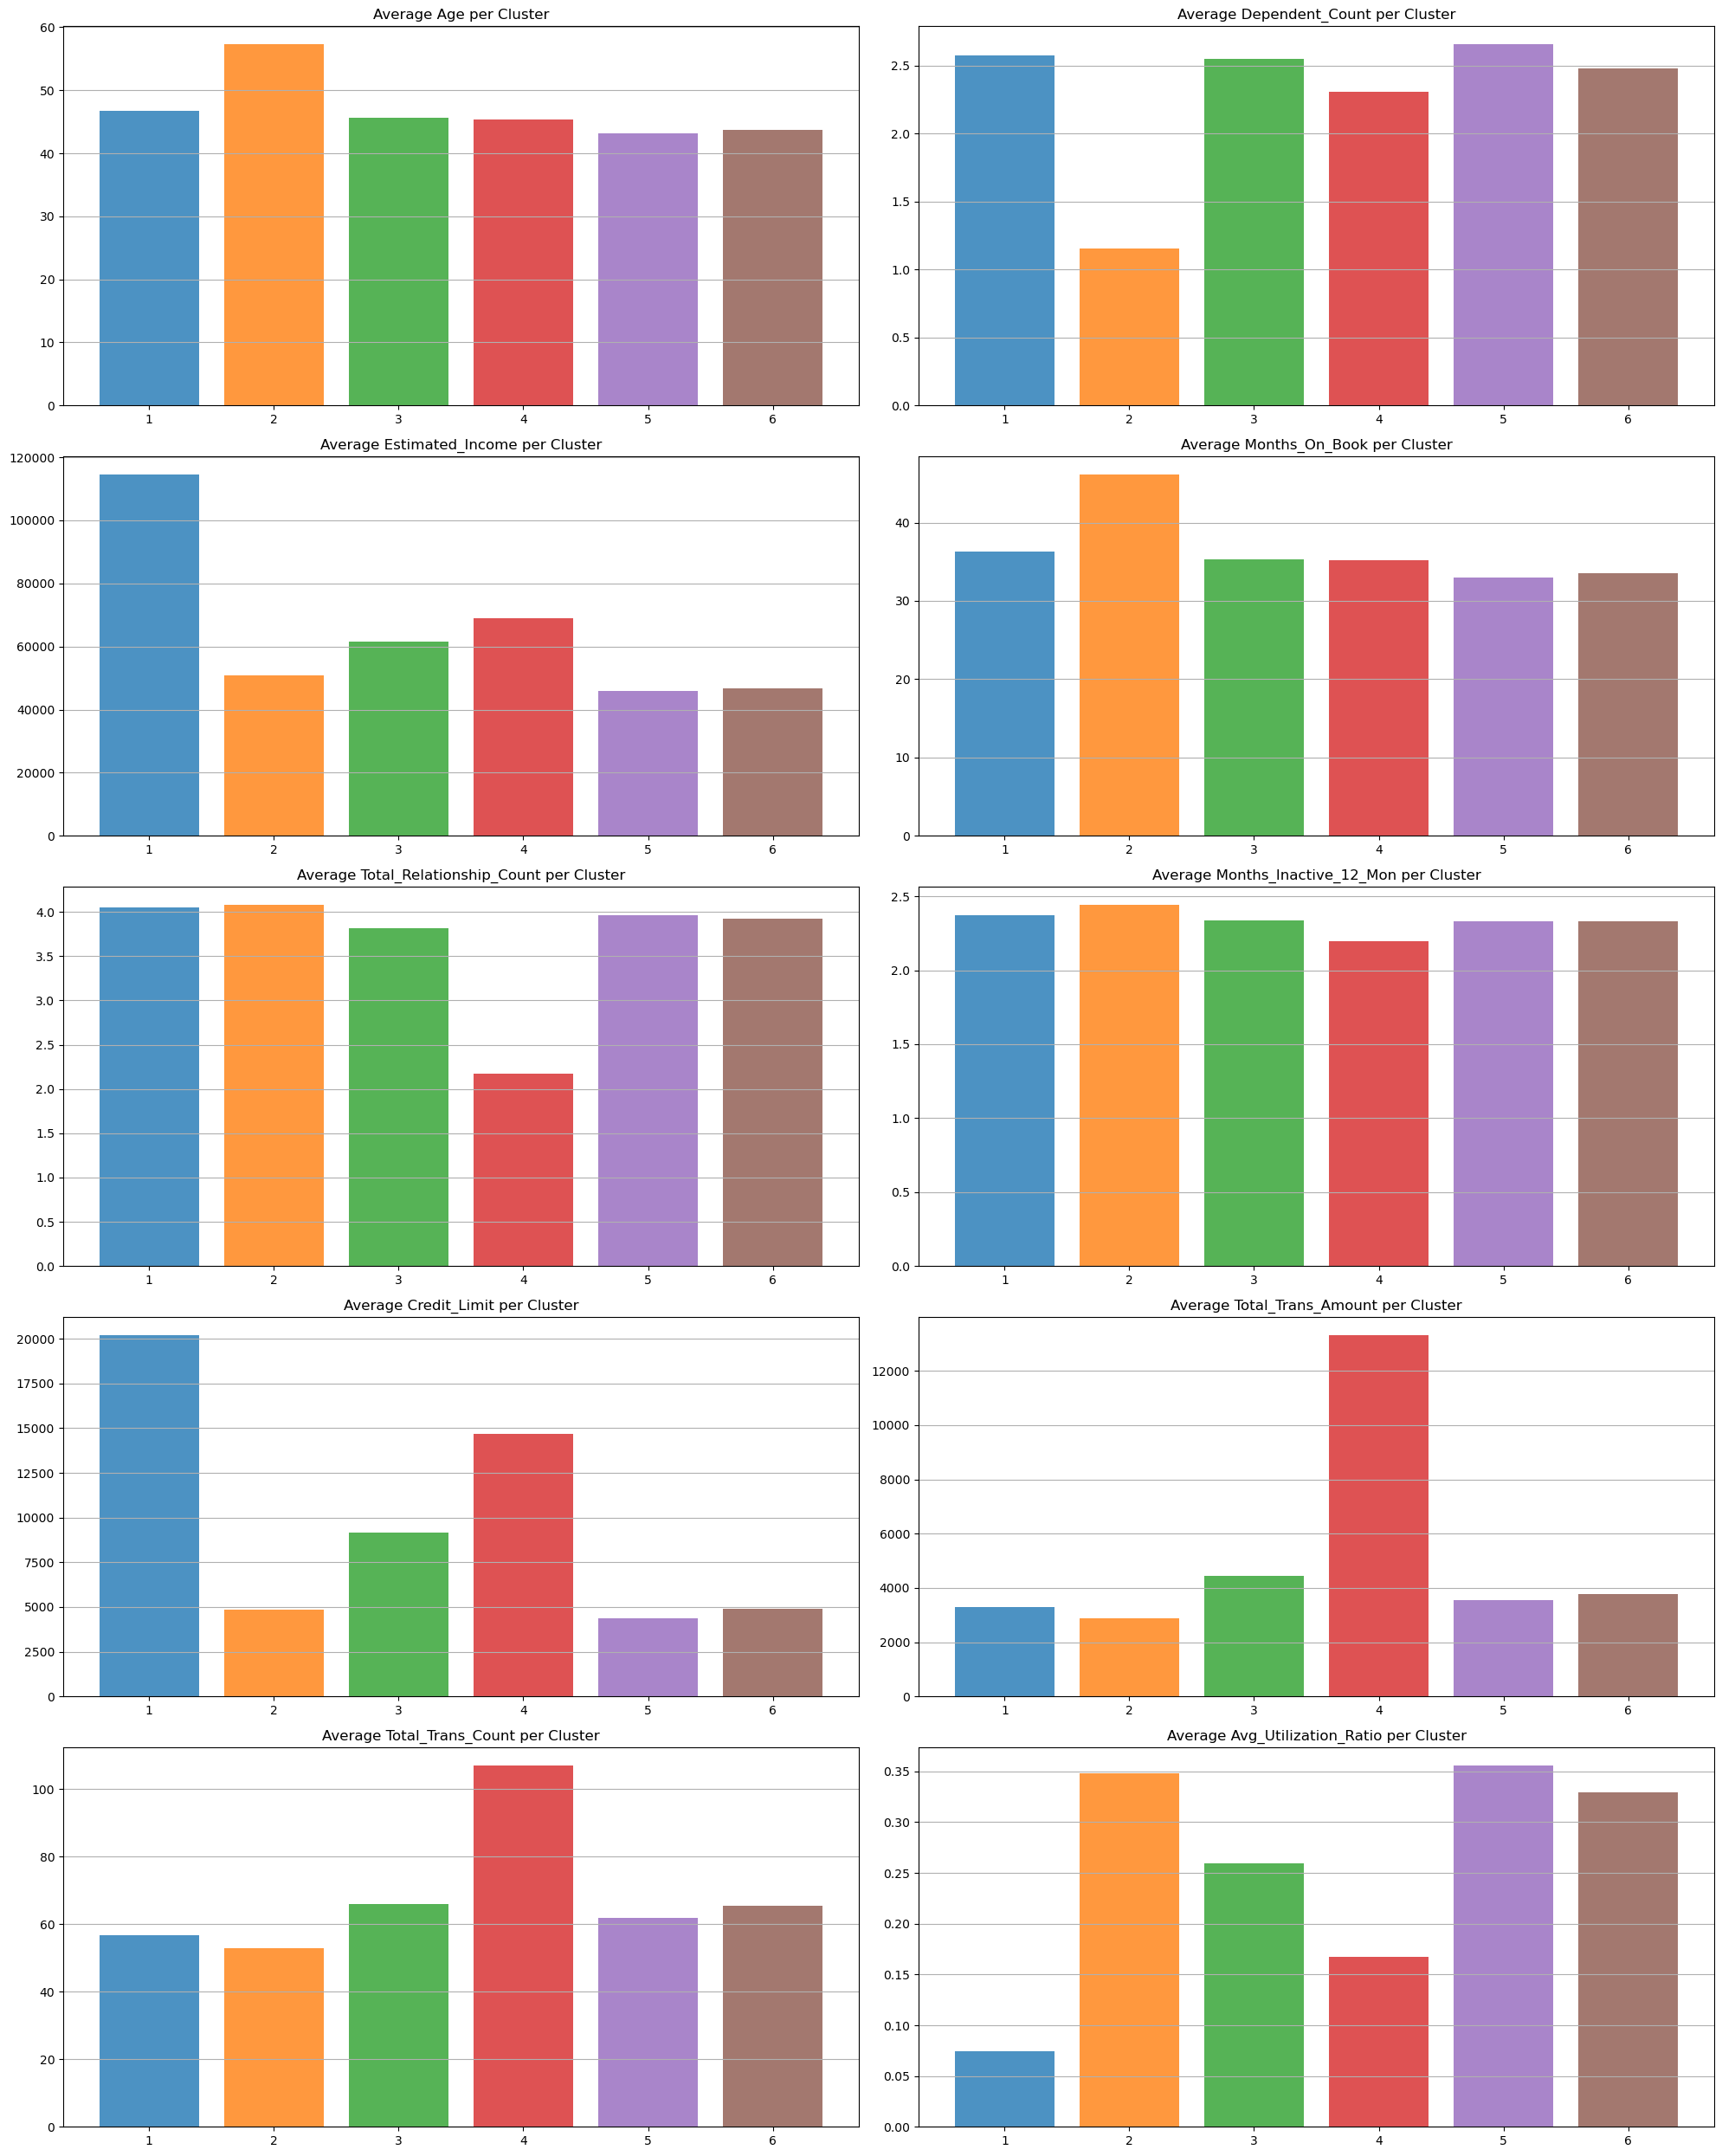

In [25]:
## Visualizing the means for each cluster per column using bar graphs

# List of numerical columns to loop thru
numerical_cols = customers.select_dtypes(include='number').columns.tolist()[1:-1]

# Figure size
fig = plt.figure(figsize=(20,25))

# Looping thru numerical_cols using enumerate to get an index for each column
for i, col in enumerate(numerical_cols):
    
    # groupby cluster per column, aggregating using mean 
    mean_grouped = customers.groupby('cluster')[col].mean()
    
    # Subplots for each column
    ax = plt.subplot(5, 2, i+1)
    
    # Bar graph of mean_grouped
    ax.bar(mean_grouped.index, mean_grouped, color=sns.color_palette(), alpha=.8)
    
    # Formated title for each plot
    ax.set_title(f'Average {col.title()} per Cluster')
    
    # Adds y-axis grids
    ax.yaxis.grid(True)

# Fits subplots into figure
plt.tight_layout()

For the numerical variables with higher correlations that we identified earlier, we can use scatter plots to visualize these correlations, grouped by clusters, and analyze how the clusters vary across different regions of the chart.

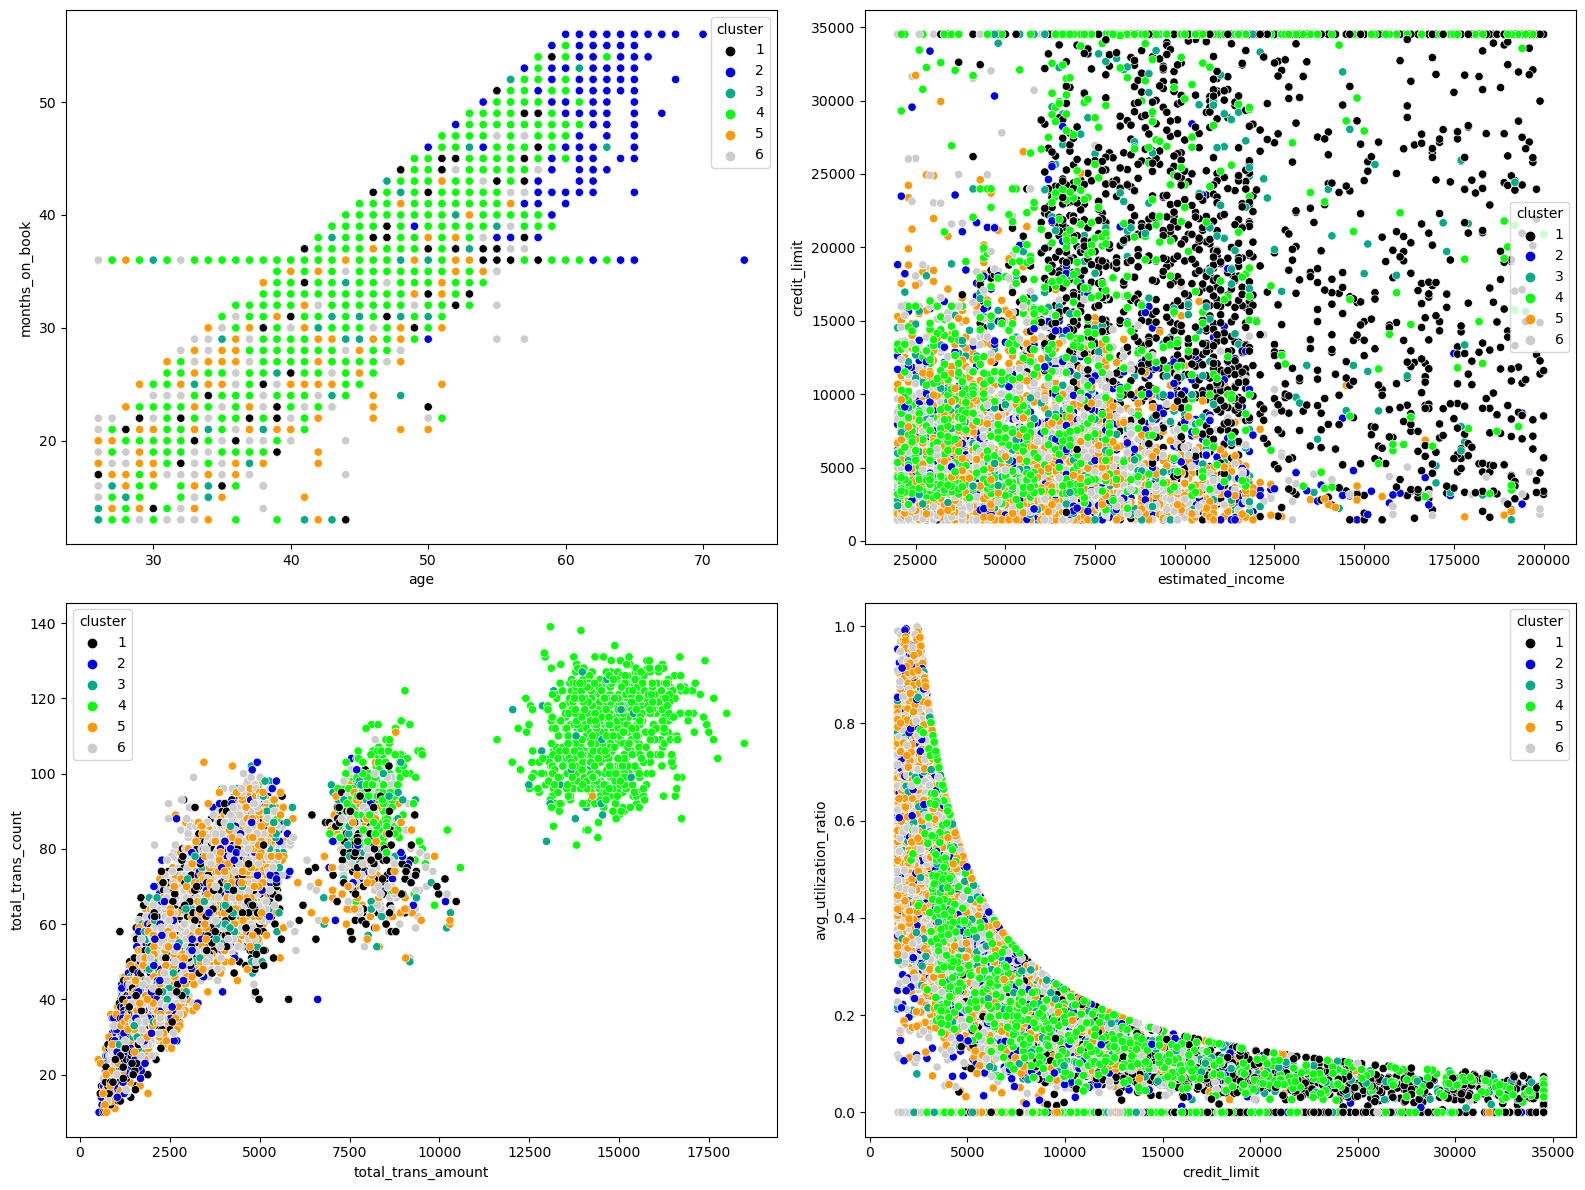

In [27]:
## Scatter plots for our strongest correlations per cluster

# Figure size for subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plots grouped by 'cluster'
sns.scatterplot(x='age', y='months_on_book', hue='cluster', data=customers, palette='nipy_spectral', ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='cluster', data=customers, palette='nipy_spectral', ax=ax2)
sns.scatterplot(x='total_trans_amount', y='total_trans_count', hue='cluster', data=customers, palette='nipy_spectral', ax=ax3)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='cluster', data=customers, palette='nipy_spectral', ax=ax4)

# Fits subplots into figure
plt.tight_layout()

Cluster 2 has older customers with the most months on the books. Cluster 4 has the most transactions and the most amount of money spent. Cluster 4 has lower credit limits with a higer balance due.

For the categorical columns, we'll plot the percentual distribution of each variable in each cluster. This will allow us to verify if a particular cluster is mostly composed of men, or of married people only, for example.

/var/folders/y4/hvrh6gb14vq_vm7rkh_0g52w0000gn/T/ipykernel_49402/1064582213.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
/var/folders/y4/hvrh6gb14vq_vm7rkh_0g52w0000gn/T/ipykernel_49402/1064582213.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
/var/folders/y4/hvrh6gb14vq_vm7rkh_0g52w0000gn/T/ipykernel_49402/1064582213.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])


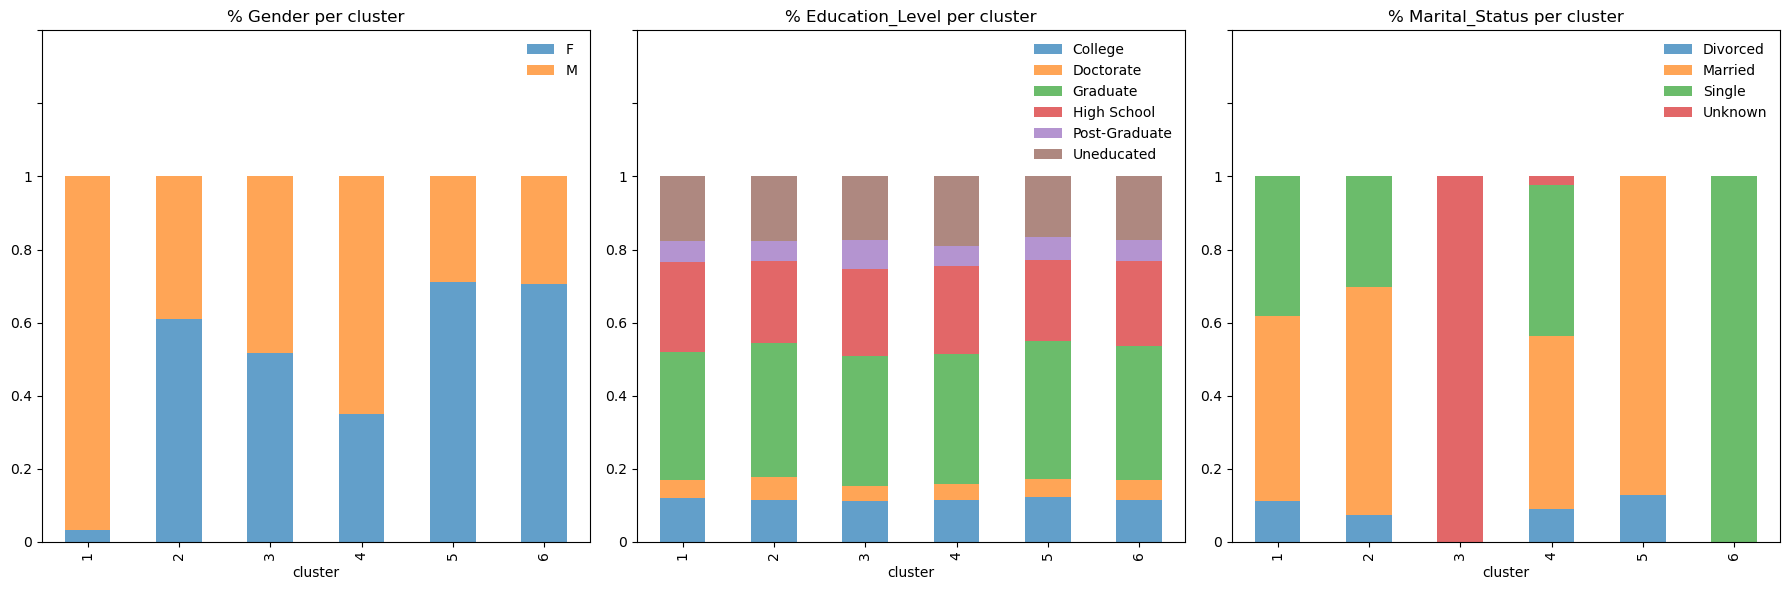

In [28]:
# Categorical columns to loop thru
cat_cols = customers.select_dtypes(include='object')

# Figure size
fig = plt.figure(figsize=(18,6))

# Looping thru categorical columns using enumerate
for i, col in enumerate(cat_cols):
    
    # Aggregates by size as a percentage per cluster for each categorical column
    cat_cross = pd.crosstab(index=customers['cluster'], columns=customers[col], values=customers[col], 
                          aggfunc='size', normalize='index')
    
    # Subplots
    ax = fig.add_subplot(1, 3, i+1)
    
    # Stacked bar graph of cat_cross
    cat_cross.plot.bar(stacked=True, ax=ax, alpha=.7)
    
    # Formatting title for each graph
    ax.set_title(f'% {col.title()} per cluster')
    
    # Sets y-axis range
    ax.set_ylim(0, 1.4)

    # Setting y-tick labels
    ax.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # Adding legend with frame 
    ax.legend(frameon=False)

# Fits subplots into figure
plt.tight_layout()  

The gender per cluster seems to be a good mix except for cluster 1 being mostly male. Education level is well divide and similar across clusters. Cluster 6 customers are all single while cluster 3 customers marital status is unkown.

# Conclusion

We now have all the customers divided into specfic clusters based on certain attributes. Here are some characteristics for the customers assigned to each cluster as well as some insight and business suggestions:

## Cluster 1
* __Characteristics__: Spend the most; Most tansactions; High credit limit; Mostly men
* __Insight__: People (majority men) with high income, credit limits, and a lot of transactions. Could receive benefits to spend even more money.

## Cluster 2
* __Characteristics__: Oldest age; Least amount of dependents; Lower credit limit; Lowest transaction amount
* __Insight__: Older people and long-time customers with low credit limit and transactions. Could receive benefits to spend more money.

## Cluster 3
* __Characteristics__: Middle of the pack on most categories; Marital status unknown; Split gender; Low credit limit; Higher avg utilization raito 
* __Insight__: Men and women with low credit limits but do have high balances.

## Cluster 4
* __Characteristics__: Higher income; Highest credit limit; mostly males; Low avg utilization raito
* __Insight__: People with high volume spent on the card, but do not use it on a daily basis. Could be incentivised to spend more.

## Cluster 5
* __Characteristics__: Mostly married; High avg utilization raito; Low credit limit, Mostly females; Low income
* __Insight__: Men and women with low credit limits but do have high balances.

## Cluster 6
* __Characteristics__: Mostly single; Mostly females, More newer customers; Lower credit limit
* __Insight__:  Single (mostly women) people that have low credit limits and income. Could be given a bit more credit limit and receive benefits to spend more money.

In [20]:
# List of customers and their assigned cluster
customers[['customer_id', 'cluster']]

,customer_id,cluster
0,768805383,1
1,818770008,6
2,713982108,1
3,769911858,3
4,709106358,5
...,...,...
10122,772366833,4
10123,710638233,5
10124,716506083,5
10125,717406983,3
